In [1]:
import pandas as pd
import math as mt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("events.csv",low_memory = False)

In [3]:
df.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [5]:
df.isnull().sum()

timestamp                         0
event                             0
person                            0
url                          928532
sku                          447450
model                        447004
condition                    447452
storage                      447452
color                        447452
skus                         789589
search_term                  962321
staticpage                  1007690
campaign_source              928492
search_engine                960331
channel                      923910
new_vs_returning             923910
city                         923910
region                       923910
country                      923910
device_type                  923910
screen_resolution            923910
operating_system_version     923910
browser_version              923910
dtype: int64

Text(0,0.5,u'frecuencia')

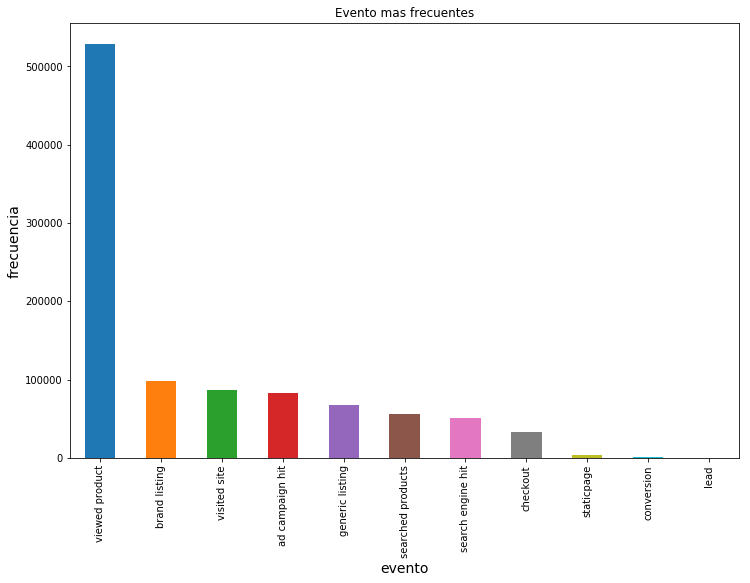

In [54]:
plot = df.groupby('event').size().sort_values(0,ascending=False).\
    plot(kind='bar',title='Evento mas frecuentes',rot=90,figsize=(12,8))
plot.set_xlabel("evento", fontsize=14)
plot.set_ylabel("frecuencia", fontsize=14)

Text(0,0.5,u'# hits')

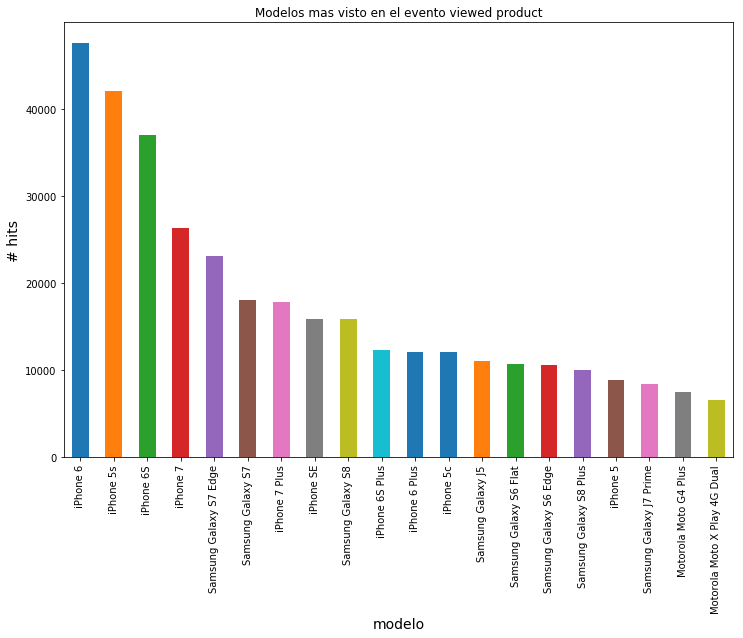

In [53]:
plot = df.loc[df['event']=='viewed product',:].dropna(subset=['model']).groupby('model').size()\
    .sort_values(0,ascending=False).head(20).\
    plot(kind='bar',title='Modelos mas visto en el evento viewed product',rot=90,figsize=(12,8))
plot.set_xlabel("modelo", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

Text(0,0.5,u'# hits')

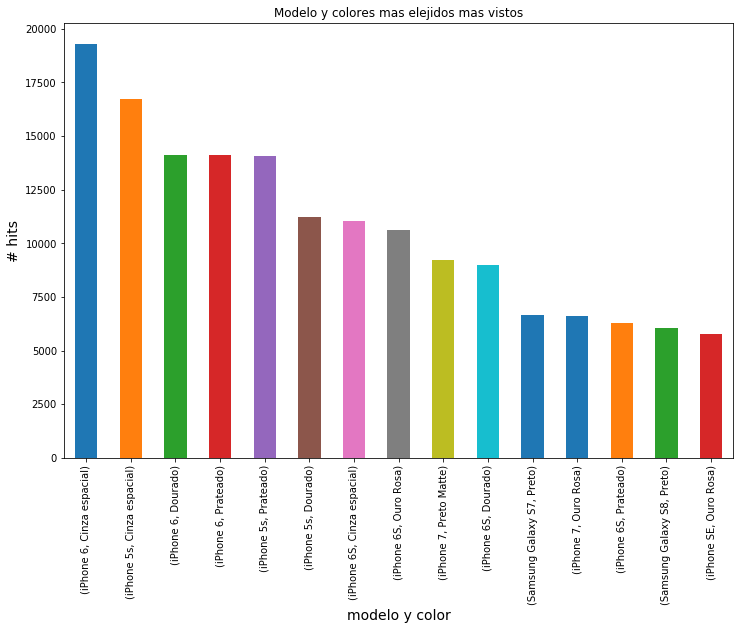

In [52]:
plot = df.loc[df['event']=='viewed product',['model', 'color']].groupby(['model','color']).size()\
    .sort_values(0,ascending=False).head(15).\
    plot(kind='bar',title='Modelo y colores mas elejidos mas vistos',rot=90,figsize=(12,8))
plot.set_xlabel("modelo y color", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.month

In [13]:
df2 = df.loc[:,['month', 'model']].dropna(subset=['model'])

Text(0,0.5,u'# hits')

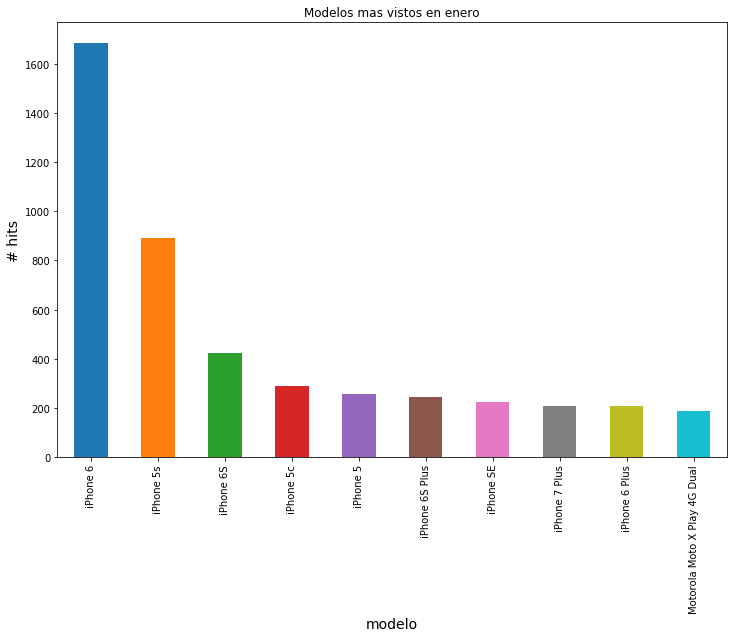

In [46]:
plot = df2.loc[df2['month']==1,:].groupby('model').size().sort_values(0,ascending=False).head(10).\
    plot(kind='bar',title='Modelos mas vistos en enero',rot=90,figsize=(12,8))
plot.set_xlabel("modelo", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

Text(0,0.5,u'# hits')

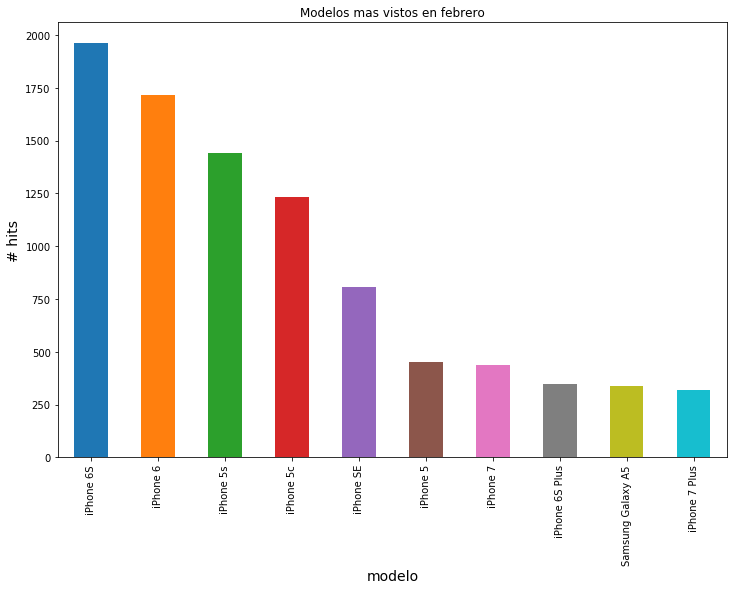

In [47]:
plot = df2.loc[df2['month']==2,:].groupby('model').size().sort_values(0,ascending=False).head(10).\
    plot(kind='bar',title='Modelos mas vistos en febrero',rot=90,figsize=(12,8))
plot.set_xlabel("modelo", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

Text(0,0.5,u'# hits')

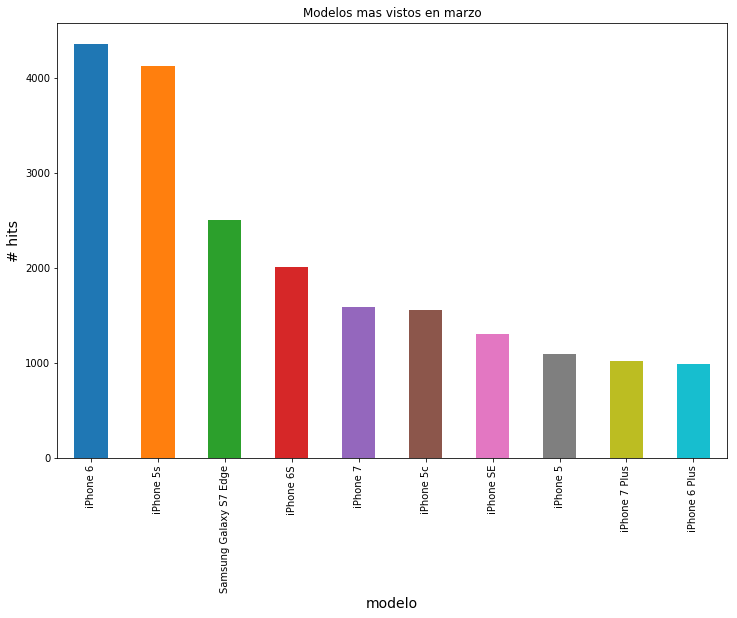

In [48]:
plot = df2.loc[df2['month']==3,:].groupby('model').size().sort_values(0,ascending=False).head(10).\
    plot(kind='bar',title='Modelos mas vistos en marzo',rot=90,figsize=(12,8))
plot.set_xlabel("modelo", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

Text(0,0.5,u'# hits')

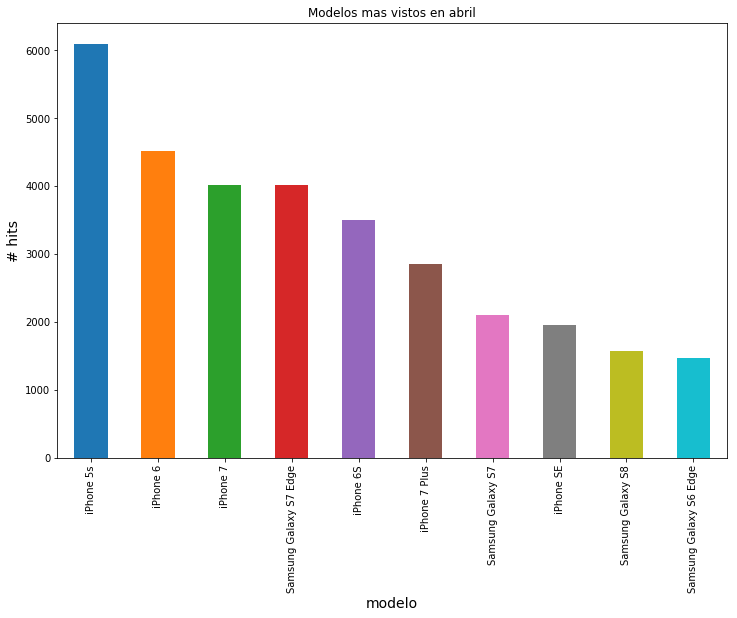

In [49]:
plot = df2.loc[df2['month']==4,:].groupby('model').size().sort_values(0,ascending=False).head(10).\
    plot(kind='bar',title='Modelos mas vistos en abril',rot=90,figsize=(12,8))
plot.set_xlabel("modelo", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

Text(0,0.5,u'# hits')

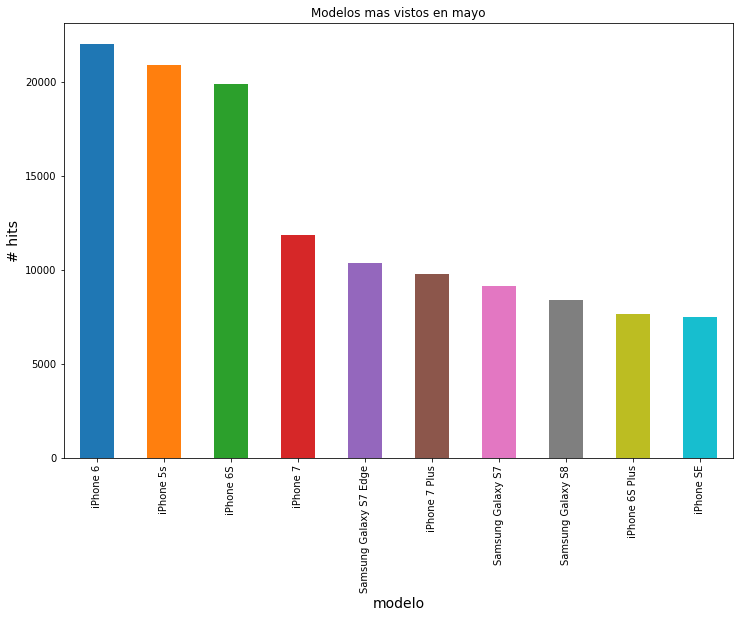

In [50]:
plot = df2.loc[df2['month']==5,:].groupby('model').size().sort_values(0,ascending=False).head(10).\
    plot(kind='bar',title='Modelos mas vistos en mayo',rot=90,figsize=(12,8))
plot.set_xlabel("modelo", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

Text(0,0.5,u'# hits')

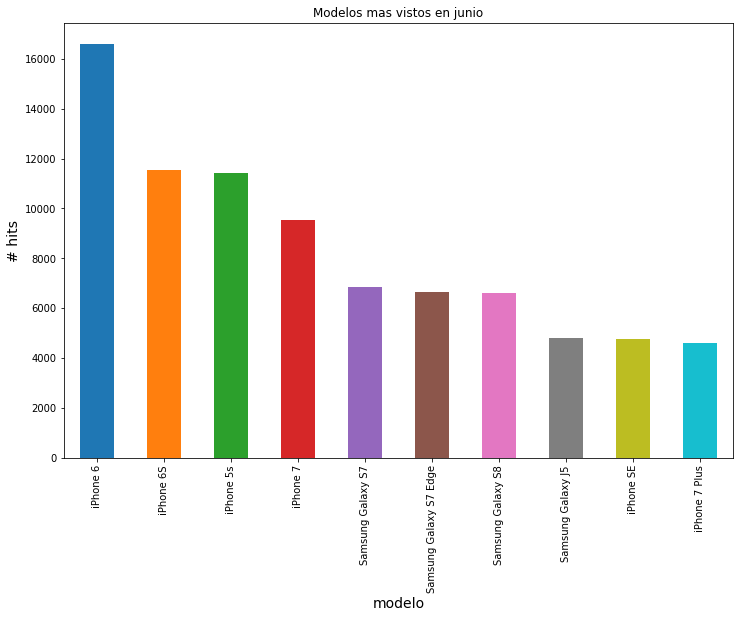

In [51]:
plot = df2.loc[df2['month']==6,:].groupby('model').size().sort_values(0,ascending=False).head(10).\
    plot(kind='bar',title='Modelos mas vistos en junio',rot=90,figsize=(12,8))
plot.set_xlabel("modelo", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)